# k-Means Clustering


### What Is k-Means?

K-means is a partition-based clustering algorithm that chops a dataset into $k$ disjoint, non-overlapping groups. The basic idea of K-means clustering is simple: given a number of clusters $k$, find the set of cluster centers and cluster assignments that minimize average Euclidean distance between each observation and its center. 


---

### How It Works

Lloyd’s algorithm:

1. **Initialize** $k$ centroids $\mu_1$, $\mu_2$, \ldots, $\mu_3$
   

2. **Assignment step**
   For every point $x_i$, assign it to the nearest centroid (Euclidean distance):

   $$
   c_i = \arg\min_{j}\;\lVert x_i - \mu_j \rVert^{2}.
   $$

3. **Centering step**
   For each cluster $j$, recalculate the centroid as the mean of its members:

   $$
   \mu_j = \frac{1}{|C_j|}\sum_{x_i\in C_j} x_i.
   $$

4. **Repeat** steps 2–3 until assignments stop changing *or* the relative drop in the objective

   $$
   \text{SSE}=\sum_{j=1}^{k}\sum_{x_i\in C_j}\lVert x_i-\mu_j\rVert^{2}
   $$

   falls below a tolerance.

The algorithm always **converges** in a finite number of iterations (monotonically decreasing SSE), though only to a **local** minimum.

---

### Pros and Cons

✅ **Simple, fast**, and scales to large sample sizes with mini-batches or parallelization.  
✅ Centroids give an **interpretable prototype** for each group.  

❌ Requires picking $k$ *a priori* (can use elbow method, silhouette scores, ...).  
❌ Sstruggles with uneven density or non-convex shapes.  
❌ Sensitive to **initial seeds** and **feature scaling**. 
❌ Not robust to outliers.  

---

### Key Hyper-parameters (`sklearn.cluster.KMeans`)

| Symbol in `sklearn` | Meaning                                              | Typical starter value  |
| ------------------- | ---------------------------------------------------- | ---------------------- |
| `n_clusters`        | number of clusters $k$                               | domain-driven or elbow |
| `n_init`            | independent restarts to try                          | 10                     |
| `max_iter`          | cap on Lloyd iterations                              | 300                    |
| `tol`               | relative SSE tolerance for convergence               | 1e-4                   |
| `algorithm`         | computation backend (`"lloyd"`, `"elkan"`, `"auto"`) | `"auto"`               |

---

Check out an [illustration](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/) of the step-by-step updates of k-Means clustering. 

We will revisit the penguin dataset to illustrate the Elbow methods and silhouette scores.

In [10]:
# Prepare data for clustering

import seaborn as sns
import pandas as pd

# Load penguin dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing values
penguins = penguins.dropna()

# Use numeric features for clustering
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
X = penguins[features]


In [18]:
from sklearn.cluster import KMeans

# Standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Try without scaling as well
# X_scaled = X

# Fit KMeans with 3 clusters (since we know there are 3 species)
# Change the random_state 
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
penguins["cluster"] = kmeans_labels


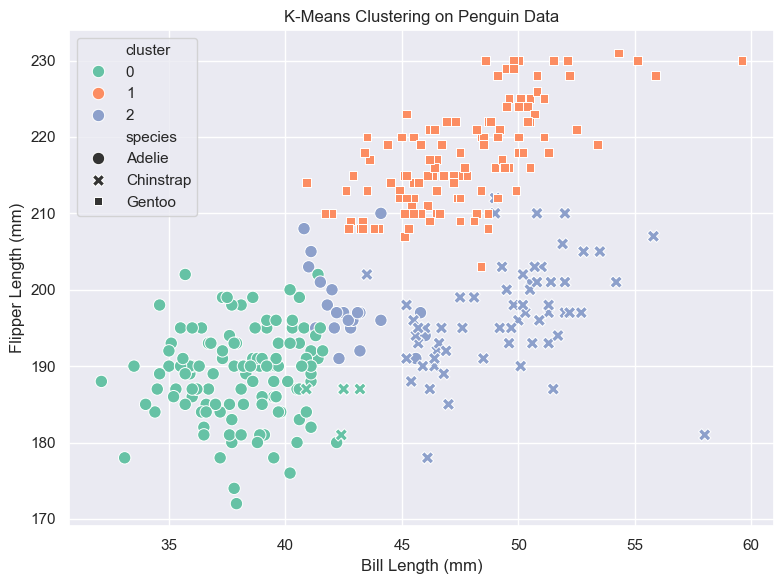

In [19]:

import matplotlib.pyplot as plt

# Plot the clustering result (on two principal features for simplicity)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=penguins, x="bill_length_mm", y="flipper_length_mm",
                hue="cluster", palette="Set2", style="species",s=80)
plt.title("K-Means Clustering on Penguin Data")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Choosing the number of clusters $k$

| Method           | What it Measures                  | Best Value Looks Like              |
| ---------------- | --------------------------------- | ---------------------------------- |
| **Elbow Method** | Within-cluster variance.          | A sharp “elbow” point in the curve |
| **Silhouette**   | Wow well each point lies within its cluster   | Highest average score (close to 1) |


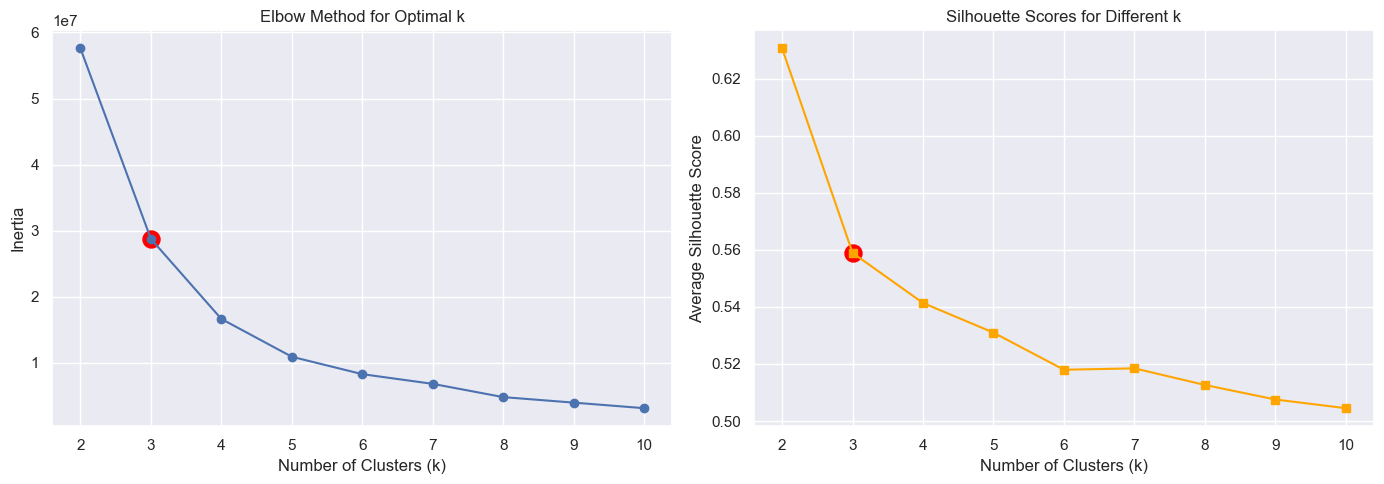

In [23]:
from sklearn.metrics import silhouette_score

# Try different K values
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    inertias.append(model.inertia_) # obtain the inertia (sum of squared distances to closest cluster center) 
    silhouette_scores.append(silhouette_score(X, labels)) # obtain the silhouette score (how similar an object is to its own cluster compared to other clusters)

# Plot Elbow and Silhouette
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
axs[0].plot(K_range, inertias, marker='o')
axs[0].scatter(3, inertias[1], s=150, c='red', label='k=3')
axs[0].set_title("Elbow Method for Optimal k")
axs[0].set_xlabel("Number of Clusters (k)")
axs[0].set_ylabel("Inertia")
axs[0].grid(True)

# Silhouette plot
axs[1].plot(K_range, silhouette_scores, marker='s', color='orange')
axs[1].scatter(3, silhouette_scores[1], s=150, c='red', label='k=3')
axs[1].set_title("Silhouette Scores for Different k")
axs[1].set_xlabel("Number of Clusters (k)")
axs[1].set_ylabel("Average Silhouette Score")
axs[1].grid(True)

plt.tight_layout()
plt.show()
